## 의사결정트리
* 나무 모양의 그래프를 사용해서 최적의 결정을 돕는 분석기법
* 기회비용에 대한 고려, 기대 이익 계산, 위험 관리등 효율적인 결정이 필요한 많은 분야에 사용되고 있음
* 의사결정트리는 회귀,분류에 사용되지만 주로 분류에 많이 이용되고 있음

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

## 결정영역 시각화를 위한 패키지 설치

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
from mlxtend.plotting import plot_decision_regions

## 예제 데이터 생성 및 분석, 시각화

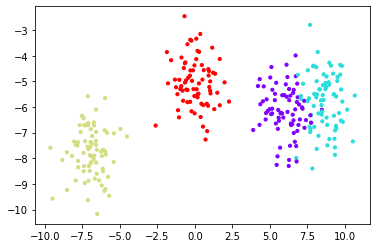

In [5]:
from sklearn.datasets import make_blobs

# make_blobs를 이용해서 정규분포를 따르는 가상데이터 생성
# n_samples : 표본수
# centers : 군집수
# cluster_std : 군집의 표준편차 (흩어짐 정도)
X, y = make_blobs(n_samples=300, centers=4,
       cluster_std=1.0, random_state=2208261235)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', s=10)
plt.show()

훈련시 정확도 1.0


/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


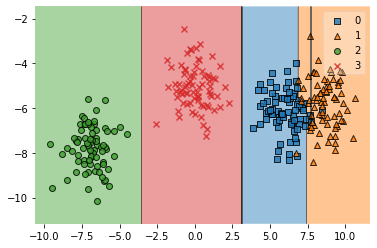

In [6]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X, y)
print('훈련시 정확도', dtclf.score(X, y))

plot_decision_regions(X, y, clf=dtclf)
plt.show()

In [7]:
# train/test 로 분리해서 다시 분석
X_train, X_test, ytrain, ytest = \
    train_test_split(X, y, test_size=0.3, random_state=2208261255)

dtclf = DecisionTreeClassifier(criterion='entropy')
dtclf.fit(X_train, ytrain)
print('훈련시 정확도', dtclf.score(X_train, ytrain))

pred = dtclf.predict(X_test)
accuracy_score(ytest, pred)

훈련시 정확도 1.0


0.9888888888888889

/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


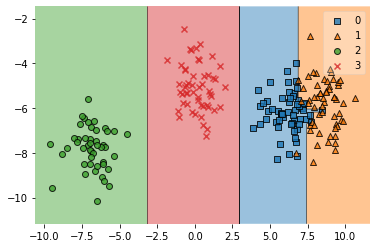

In [8]:
# 훈련시 결정영역 시각화
plot_decision_regions(X_train, ytrain, clf=dtclf)
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


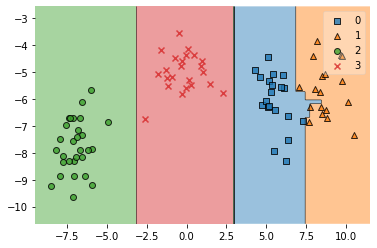

In [9]:
# 테스트시 결정영역 시각화
plot_decision_regions(X_test, ytest, clf=dtclf)
plt.show()

## 분류결과를 tree형태로 시각화
* 출력하려면 graphviz라는 라이브러리 필요!
     + graphviz.org => stable 2.38 windows => graphviz-2.38.zip
         + c:/Java 아래에 압축 해제 
         + 폴더명은 graphviz-2.38
         + bin 폴더를 PATH 환경변수로 등록
     + 리눅스는 yum install -y graphviz
     + 맥은 brew install graphviz
* 파이썬 pydotplus 패키지도 필요함     

In [10]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pydotplus
from sklearn import tree

In [12]:
dot_data = tree.export_graphviz(dtclf, out_file=None) # 그래프 관련 dot데이터 추출
graph = pydotplus.graph_from_dot_data(dot_data)       # dot데이터를 토대로 그래프 생성

graph.write_png('blobs.png')   # 그래프를 그림파일로 저장
#graph.write_png('imgs/blobs.png')   # 그래프를 그림파일로 저장

InvocationException: GraphViz's executables not found

In [ ]:
# 그림파일을 jupyter 내에서 출력
import matplotlib.image as pltimg

img = pltimg.imread('imgs/blobs.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()

## iris 를 이용한 의사결정트리 시각화

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data[:, 2:]
target = iris.target

X_train, X_test, ytrain, ytest = \
    train_test_split(data, target, test_size=0.3, stratify=target,
                     random_state=2208261445)

In [14]:
dtclf = DecisionTreeClassifier(criterion='entropy')
dtclf.fit(X_train, ytrain)
pred = dtclf.predict(X_test)

print(dtclf.score(X_train, ytrain), accuracy_score(ytest, pred))

0.9904761904761905 0.9333333333333333


In [15]:
from mlxtend.plotting import plot_decision_regions

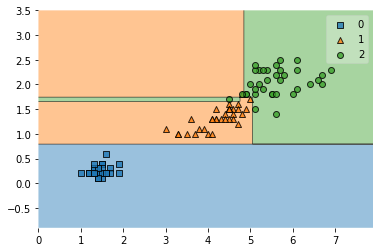

In [16]:
plot_decision_regions(X_train, ytrain, clf=dtclf)
plt.show()

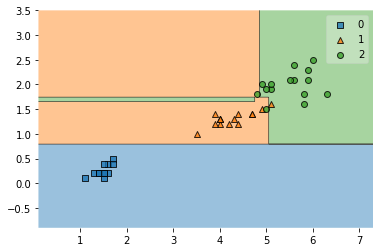

In [17]:
plot_decision_regions(X_test, ytest, clf=dtclf)
plt.show()

## 분류결과를 tree형태로 시각화
* 출력하려면 graphviz라는 라이브러리 필요!
     + graphviz.org => stable 2.38 windows => graphviz-2.38.zip
         + c:/Java 아래에 압축 해제 
         + 폴더명은 graphviz-2.38
         + bin 폴더를 PATH 환경변수로 등록
     + 리눅스는 yum install -y graphviz
     + 맥은 brew install graphviz
* 파이썬 pydotplus 패키지도 필요함     

In [18]:
import pydotplus
from sklearn import tree

In [19]:
# feature_names : 의사결정 나무 시각화시 특성 이름 지정
# class_names : 의사결정 나무 시각화시 분류결과 이름 지정
dot_data = tree.export_graphviz(dtclf, out_file=None,
                   feature_names=iris.feature_names[2:],
                   class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)    

graph.write_png('iris_dtclf.png') 

InvocationException: GraphViz's executables not found

In [ ]:
img = pltimg.imread('imgs/iris_dtclf.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()